Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
55000 (55000, 784) (55000, 10)
5000 (5000, 784) (5000, 10)


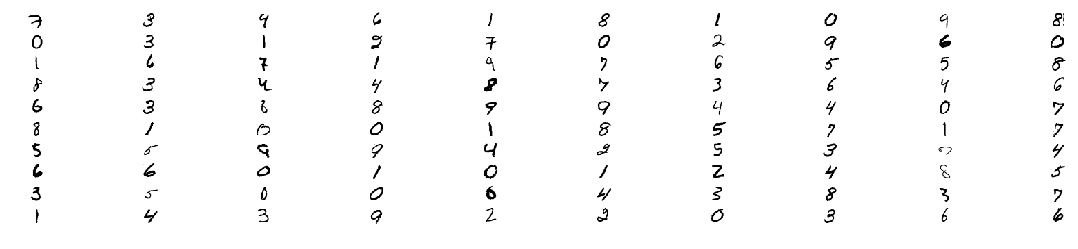

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

ntrain = mnist.train.num_examples
Xtrain = mnist.train.images
ytrain = mnist.train.labels
print(ntrain,Xtrain.shape,ytrain.shape)

ntest = mnist.test.num_examples
Xtest = mnist.test.images
ytest = mnist.test.labels

nvalidation = mnist.validation.num_examples
Xvalidation = mnist.validation.images
yvalidation = mnist.validation.labels
print(nvalidation,Xvalidation.shape,yvalidation.shape)

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")
    
%matplotlib inline
plt.figure(figsize=(20,40))
for iteration in range(100):
    plt.subplot(100, 10, iteration + 1)
    plot_image(Xtrain[iteration,:])


In [2]:
# Ridge regression with SGD
n_inputs = 28 * 28

Xmean = np.mean(Xtrain,axis=0) # mean of data vector
ymean = np.mean(ytrain,axis=0) # bias of the model

X = tf.placeholder(tf.float32,[None, n_inputs])
Xm = X - Xmean # data centering
y = tf.placeholder(tf.float32,[None, 10])

lr = 0.001 # learning rate
lam_val = 1 # regularization parameter

theta = tf.Variable(tf.random_normal([n_inputs,10])) # parameter of the linear model
logits= tf.matmul(Xm,theta)+ymean # scores
yp    = tf.nn.softmax(logits)
cross_entropy = -tf.reduce_mean(y * tf.log(yp)) + lam_val * tf.reduce_mean(tf.square(theta))

#optimizer = tf.train.GradientDescentOptimizer(learning_rate = lr) # tensorflow optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = lr) # another better optimizer

training_op = optimizer.minimize(cross_entropy)

y1 = tf.placeholder(tf.float32,[None, 10])
y2 = tf.placeholder(tf.float32,[None, 10])
acc = 100.0*tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y1,axis=1),tf.argmax(y2,axis=1)),tf.float32))

init = tf.global_variables_initializer()

n_epochs = 100
batch_size = 200

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        # compute model
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            #y_batch = y_batch.reshape(batch_size,1)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        
        if epoch%10 == 0:
            theta_value = theta.eval()
            # prediction on training set
            yp_train = yp.eval(feed_dict={X:Xtrain, theta:theta_value})
            acc_train = acc.eval(feed_dict={y1:ytrain, y2:yp_train})
            regerr_train = tf.reduce_mean(tf.square(yp_train-ytrain)).eval()
        
            # prediction on validation set
            yp_validation = yp.eval(feed_dict={X:Xvalidation, theta:theta_value})
            acc_validation = acc.eval(feed_dict={y1:yvalidation, y2:yp_validation})
            regerr_validation = tf.reduce_mean(tf.square(yp_validation-yvalidation)).eval()        
                    
            print(regerr_train, regerr_validation, acc_train, acc_validation)
            
        theta_value = theta.eval()
    # Now that the model is trained, it is the test time!
    yp_test = yp.eval(feed_dict={X:Xtest, theta:theta_value})
    acc_test = acc.eval(feed_dict={y1:ytest, y2:yp_test})
    print(acc_test)


0.0844622515265 0.0831143279867 48.4255 48.98
0.0172242944375 0.0162413983952 88.4945 89.06
0.0145246904008 0.0136547693217 90.7473 91.32
0.0144413334203 0.0136677779554 90.9 91.34
0.0144356803382 0.013639546656 90.8818 91.48
0.0144645916612 0.0136301032063 90.8109 91.46
0.0144496509578 0.0136670916007 90.8418 91.52
0.0144270624296 0.013574277688 90.8691 91.26
0.0144278695643 0.0136400620246 90.8982 91.34
0.0144516137793 0.0136701278606 90.8218 91.28
91.04


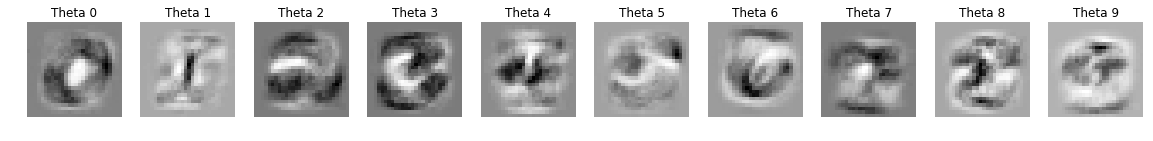

In [4]:
import matplotlib
import matplotlib.pyplot as plt

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")
    
%matplotlib inline
plt.figure(figsize=(20,40))
for iteration in range(10):
    plt.subplot(1, 10, iteration + 1)
    plot_image(theta_value[:,iteration])
    plt.title('Theta ' + str(iteration))